
# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is an attempt to investigate The Movie Database. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This cleaned database is originated from Kaggle.

> The aim of this project is to answer questions:

- Is there a relationship between budget and revenue; between popularity and budget; and between popularity and revenue?
- What is the most produced genre and the most popular genres by average rating?
- What is the most popular Genre per year?
- What genre delivered the highest revenue?

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, data will be loaded, checked for cleanliness, and then trimed and cleaned for analysis. 

### General Properties

In [97]:
# import statements for all of the packages 
# imports and load data
import numpy as np
import pandas as pd

# magic function to visualize inline

% matplotlib inline

In [98]:
# Load your data and print out a few lines.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [99]:
#check number of rows and columns
df.shape

(10866, 21)


### Data Cleaning 

In this section, data will be pre-processed for investigation. Firstly the irrelevant for investigation columns will be dropped. Secondly, the trimmed data frame investigated for midding values and dropping the corresponding rows. I have replaced zero values in revenue and budget to average. 

In [100]:
# remove columns irrelevant for investigation
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview',
         'runtime', 'release_date', 'cast', 'budget_adj', 'revenue_adj','director',
         'production_companies', 'vote_count',	'vote_average'],
        axis = 1, inplace = True)
df.head(2)

,popularity,budget,revenue,original_title,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015


In [101]:
# Operation to inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 509.4+ KB


In [102]:
#count null rows in each column 
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
genres            23
release_year       0
dtype: int64

In [103]:
# investigate all rows with missing values
null_data = df[df.isnull().any(axis=1)]
null_data

,popularity,budget,revenue,original_title,genres,release_year
424,0.244648,0,0,Belli di papÃ,NaN,2015
620,0.129696,0,0,All Hallows' Eve 2,NaN,2015
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,NaN,2014
1712,0.302095,0,0,Prayers for Bobby,NaN,2009
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,NaN,2009
2370,0.081892,0,0,Freshman Father,NaN,2010
2376,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,2010
2853,0.130018,0,0,Vizontele,NaN,2001
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,NaN,2008
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,NaN,2012


In [104]:
#remove rows with missing values
df.dropna(subset=[ 'genres'], inplace = True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
genres            0
release_year      0
dtype: int64

In [105]:
#check any values equal to zero (5993)
sum(df['revenue']==0.0)

5993

In [106]:
#check any values equal to zero (5674)
sum(df['budget']==0.0)

5674

In [107]:
#replace zero values with mean
nonzero_mean = df[ df['revenue'] != 0 ].mean()
df.loc[ df['revenue'] == 0, "revenue" ] = nonzero_mean

In [108]:
#replace zero values with mean
nonzero_mean = df[ df['budget'] != 0 ].mean()
df.loc[ df['budget'] == 0, "budget" ] = nonzero_mean

In [109]:
sum(df['revenue']==0.0)

0

In [110]:
sum(df['budget']==0.0)

0

In [111]:
df.shape

(10843, 6)

<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will explore the pre-processed data in an attempt to answer research questions. 

### Research Question 1 (Is there a relationship between budget and revenue; between popularity and budget; and between popularity and revenue?)

Before any investigation, I will print and plot statistics, to determine shape, range and distribution of data. 

In [112]:
#get statistical data for numeric values
df.describe()

,popularity,budget,revenue,release_year
count,10843.000000,5.169000e+03,4.850000e+03,10843.000000
mean,0.647456,3.074538e+07,8.922066e+07,2001.315595
std,1.000986,3.890207e+07,1.620684e+08,12.813298
min,0.000065,1.000000e+00,2.000000e+00,1960.000000
25%,0.208253,6.000000e+06,7.708081e+06,1995.000000
50%,0.384555,1.700000e+07,3.182654e+07,2006.000000
75%,0.715349,4.000000e+07,9.991823e+07,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,2015.000000


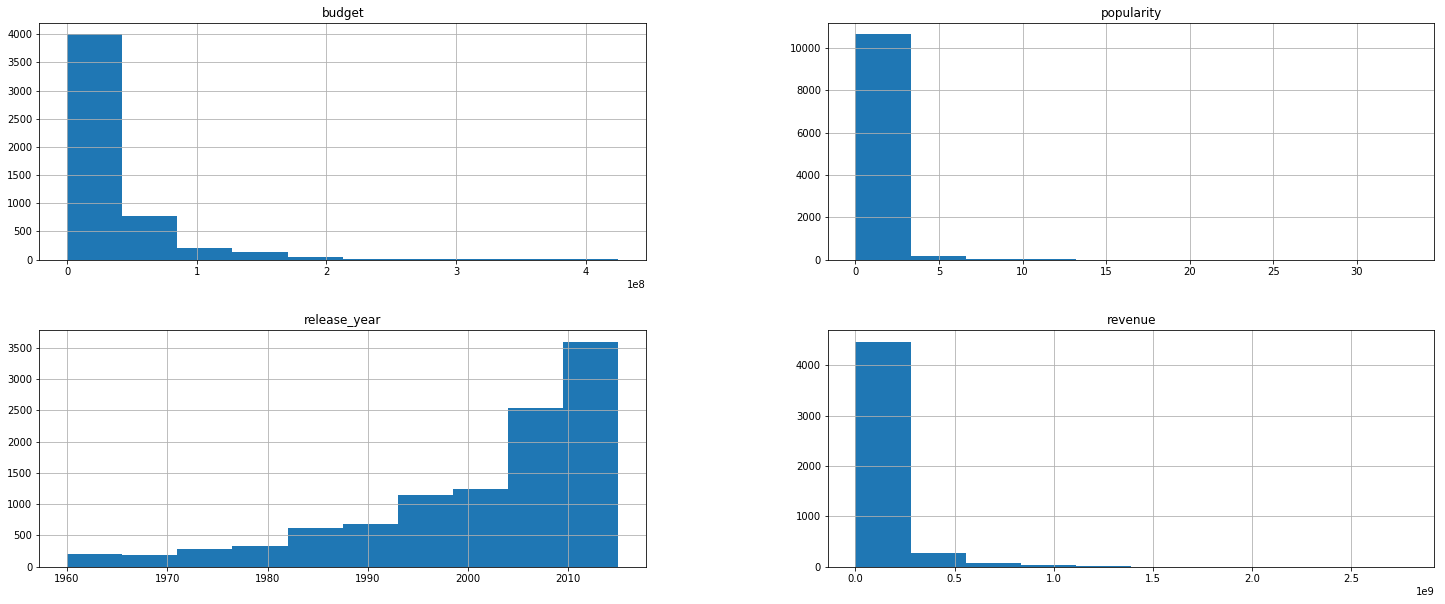

In [113]:
#visualy check distribution of numerical values
df.hist(figsize = (25, 10));

All distributions have some outliers and skewed to the right, the only release_year has hot left-handed shape due to the increase in movies production over the years. I would like to investigate the association for right-handed distributions. 

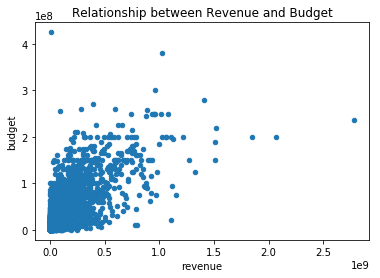

In [114]:
df.plot.scatter('revenue','budget',  title = "Relationship between Revenue and Budget");

In [115]:
#calculate the relationship between two variables
df['revenue'].corr(df['budget'])

0.68854767758940649

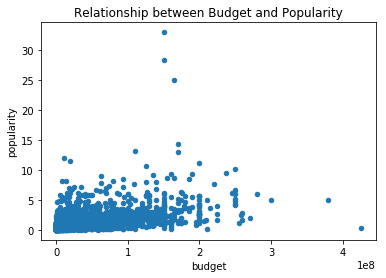

In [116]:
df.plot.scatter('budget','popularity', title = "Relationship between Budget and Popularity");

In [117]:
#calculate the relationship between two variables
df['popularity'].corr(df['budget'])

0.47992366698197741

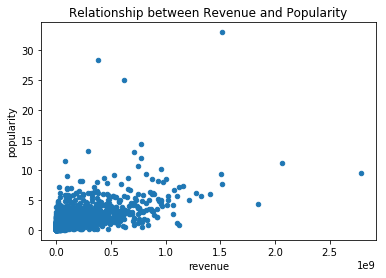

In [118]:
df.plot.scatter('revenue','popularity', title = "Relationship between Revenue and Popularity");

In [119]:
#calculate the relationship between two variables
df['popularity'].corr(df['revenue'])

0.62931566789403459

All three variables show a positive correlation between each other.
Still, the strongest 0.69 is between revenue and budget, the relationship between budget and popularity displays 0.48, moderate correlation.
The association between popularity and revenue equal to 0.63.

### Research Question 2 (What is the most produced genre and the most popular genres by average rating?)

Genres represented in a column 'genres' as a string contained different genres, separated by '|'. Each movie has between one and five genres. I made a decision to keep the first one. 

In [120]:
# separate genres and keep the first one.  
df['genres'] =df['genres'].str.split('|', expand = True)

In [121]:
#count totals for each genre
top_produced_genres = df.genres.value_counts()
top_produced_genres

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

Text(0.5,1,'Top 10 most popular genres produced')

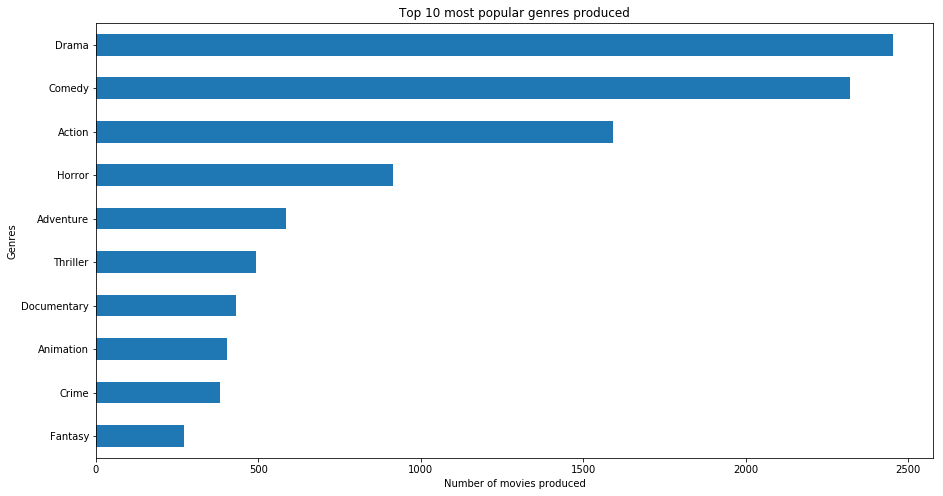

In [122]:
#plot 10 most poduced genres
ax = top_produced_genres.sort_values().tail(10).plot(kind = 'barh', figsize=(15, 8));
# Set x-axis label
ax.set_xlabel("Number of movies produced")
# Set y-axis label
ax.set_ylabel("Genres")
# Set title 
ax.set_title("Top 10 most popular genres produced")

Text(0.5,1,'Top 10 most popular genres by average rating')

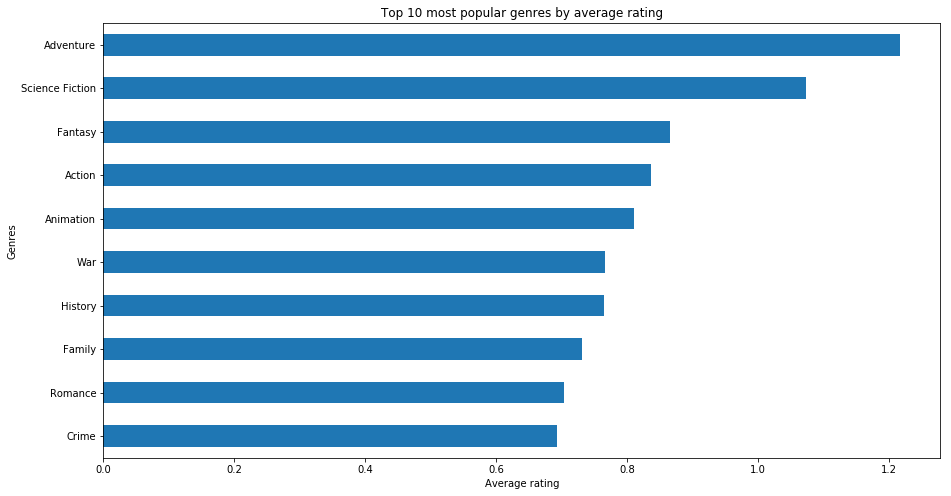

In [123]:
popularity_genres = df.groupby('genres').popularity.mean()
ax_1 = popularity_genres.sort_values().tail(10).plot(kind = 'barh', figsize=(15, 8));
# Set x-axis label
ax_1.set_xlabel("Average rating")
# Set y-axis label
ax_1.set_ylabel("Genres")
# Set title 
ax_1.set_title("Top 10 most popular genres by average rating")

### Research Question 3 (What is the most popular Genre per year?)

In [124]:
# establish the most popilar genre by year with highies popularity score
top_genre_by_year =df.groupby('release_year', as_index= True)['genres','popularity'].first()
top_genre_by_year.tail(10)



,genres,popularity
release_year,,
2006,Fantasy,5.838503
2007,Adventure,4.965391
2008,Drama,8.466668
2009,Action,9.432768
2010,Action,9.363643
2011,Action,8.411577
2012,Science Fiction,7.637767
2013,Animation,6.112766
2014,Adventure,24.949134


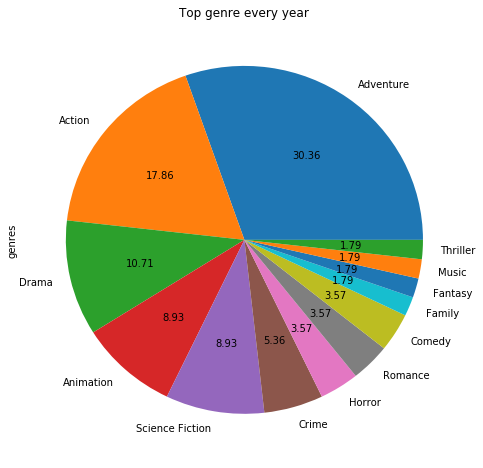

In [125]:
# plot top genres for each year, cumulative
top_genre_by_year['genres'].value_counts().plot(kind = 'pie', autopct='%.2f', figsize=(8, 8), title='Top genre every year');

This pie chart displays the most popular genres based on top genre per each year and Adventure is most often top genre, it represents one-third of all genres. 

### Research Question 4 (What genre delivered the highest revenue?)

Text(0.5,1,'Top 10 most profitable genres')

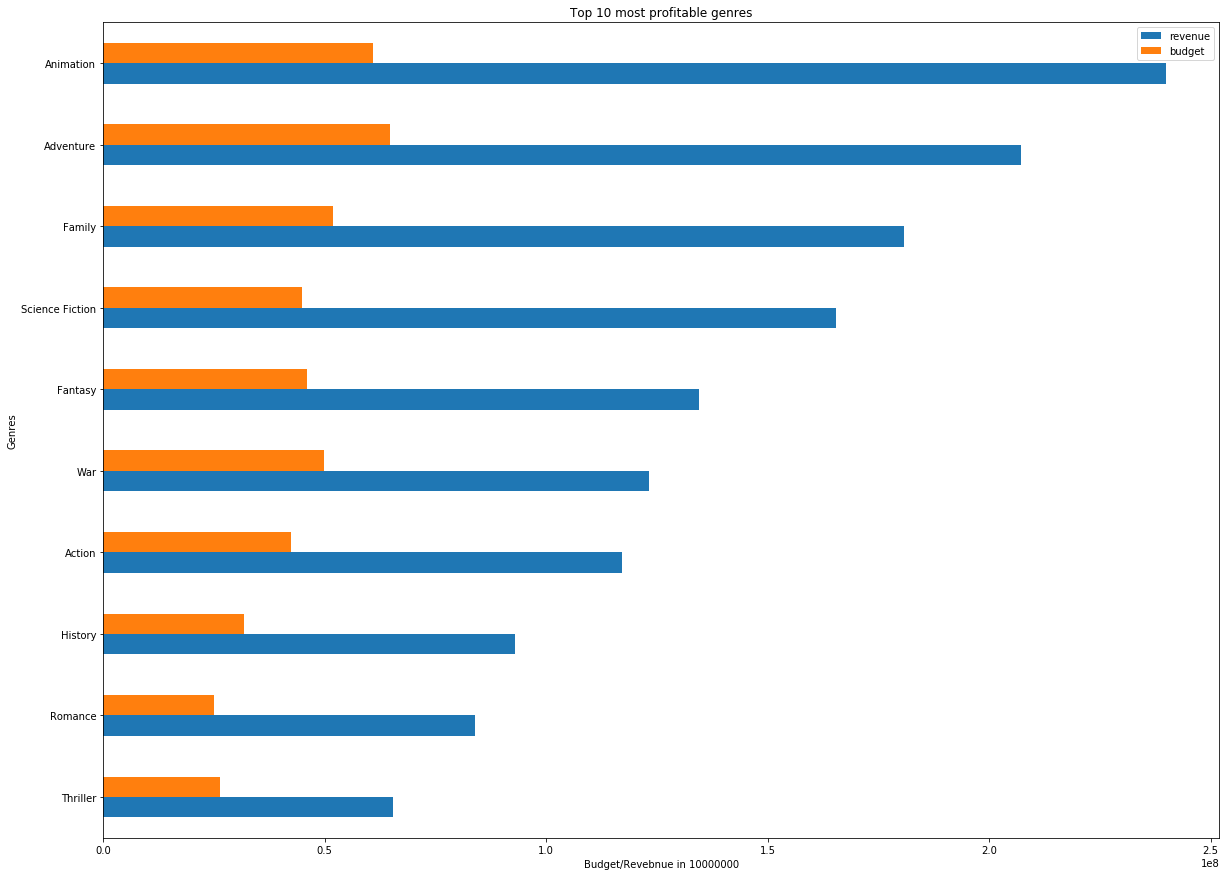

In [126]:
top_revenue_by_genre_revenue = df.groupby('genres')['revenue','budget'].mean()
#popularity_genres = df.groupby('genres').popularity.mean()
top_revenue_by_genre_revenue
#plot
ax_2 = top_revenue_by_genre_revenue.sort_values('revenue')[9:-1].plot( y=['revenue','budget'], kind="barh",figsize=(20,15));
# Set x-axis label
ax_2.set_xlabel("Budget/Revebnue in 10000000")
# Set y-axis label
ax_2.set_ylabel("Genres")
# Set title 
ax_2.set_title("Top 10 most profitable genres")

As I studied in first research questions, there is a strong positive correlation between budget and revenue. Above chart lists the top ten profitable genres, with confident winning genre Animation.

<a id='conclusions'></a>
## Conclusions


During this project, I explored Movie dataset relating to movies produced from 1960 to 2015, the data, includes: release year, popularity, budget, revenue, rating and other information. During the initial stage, I uploaded the CSV file, trimmed and removed missing and irrelevant values. My goal was to determine if there is any correlation, between budget, revenue and popularity. There is a strong positive dependence between these variables with the strongest between budget and revenue. My second insight displays the most producable genre Drama, despite the most popular genre based on average popularity rating is Adventure and Drama is not even in the top ten genres. My third observation determines the most popular genre each year by maximum popularity rating. Adventure is a prominent winner with 30 per cent segment, the second best is Action with 18 % and Drama is in third position (10%). In my final investigation, I ranked genres based on revenue. The most profitable is Adventure, Drama is in 13th position. To conclude,  despite,  Adventure is the most popular and Animation is the most profitable categories, there is a tendency to produce more Drama Movies in the Film Industry.  
***
***Limitations*** 
While performing my cleaning and data exploration, I have to highlight some limitation in my research. Firstly, there are other ways to separate and study genres, in my case, I separated the first genre in genres lists, but instead, I could use all values. Secondly, to give a more detailed view, I could use vote counts and vote averages. Finaly, I have replaced zero values in Revenue (5593) and Budget (5674) columns with mean values. It is more than a half of observations(rows = 10843). It has an impact on my results which may be biased or misleading. 


In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0